# Analysis Report for WeRateDogs Tweet Analysis Project

This report is to communicate the insights and display the visualizations produced from the wrangled data collected from three different sources:
* The WeRateDogs Twitter account archive
* The tweet image predictions according to a neural network
* Twitter API for additional tweet data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('twitter_archive_master.csv')

**Top five most common breeds featured in the tweets:**
1. Golden retriever
2. Labrador retriever
3. Pembroke
4. Chihuahua
5. Pug

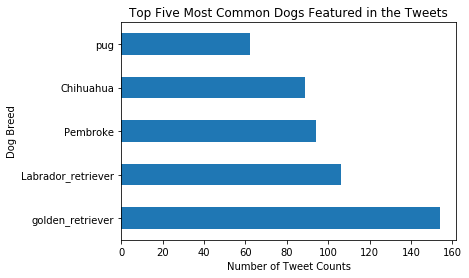

In [3]:
df.dog_breed.value_counts()[['golden_retriever', 'Labrador_retriever', 
                             'Pembroke', 'Chihuahua','pug']].plot(kind='barh')
plt.xlabel('Number of Tweet Counts')
plt.ylabel('Dog Breed')
plt.title('Top Five Most Common Dogs Featured in the Tweets');


**Top five most favorite breeds by total favorite and retweet counts:**
1. Golden retriever
2. Labrador retriever
3. Pembroke
4. Chihuahua
5. Samoyed

**Golden_retriever is the most favorite dog breed by total favorite counts and retweet counts.** 

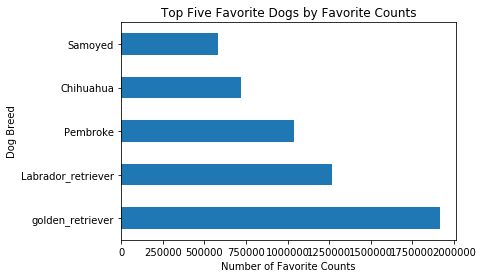

In [4]:
top5_breed_fav = df.groupby('dog_breed').sum().favorite_count.nlargest(5)
top5_breed_fav.plot(kind='barh')
plt.xlabel('Number of Favorite Counts')
plt.ylabel('Dog Breed')
plt.title('Top Five Favorite Dogs by Favorite Counts');

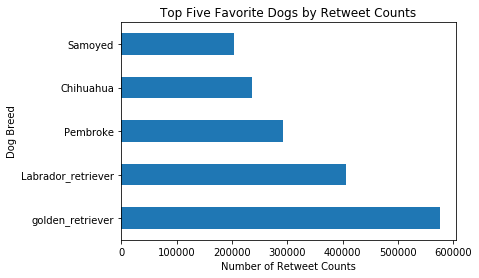

In [5]:
top5_breed_retweet = df.groupby('dog_breed').sum().retweet_count.nlargest(5)
top5_breed_retweet.plot(kind='barh')
plt.xlabel('Number of Retweet Counts')
plt.ylabel('Dog Breed')
plt.title('Top Five Favorite Dogs by Retweet Counts');

**However, among the top five dog breed by favorite and retweet counts, Samoyed has the most average favorite counts, retweet counts, and rating for a tweet.**

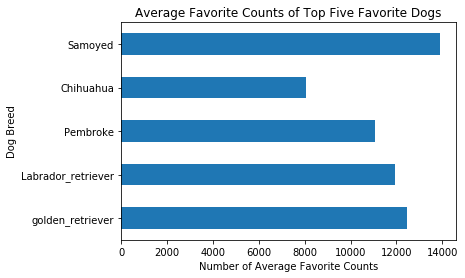

In [6]:
average_fav = df.groupby('dog_breed').mean().favorite_count[['golden_retriever', 'Labrador_retriever',
                                                             'Pembroke', 'Chihuahua','Samoyed']] 
average_fav.plot(kind='barh')
plt.xlabel('Number of Average Favorite Counts')
plt.ylabel('Dog Breed')
plt.title('Average Favorite Counts of Top Five Favorite Dogs');

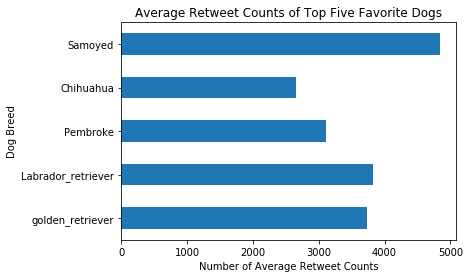

In [7]:
average_retweet = df.groupby('dog_breed').mean().retweet_count[['golden_retriever', 'Labrador_retriever',
                                                                'Pembroke', 'Chihuahua','Samoyed']] 
average_retweet.plot(kind='barh')
plt.xlabel('Number of Average Retweet Counts')
plt.ylabel('Dog Breed')
plt.title('Average Retweet Counts of Top Five Favorite Dogs');

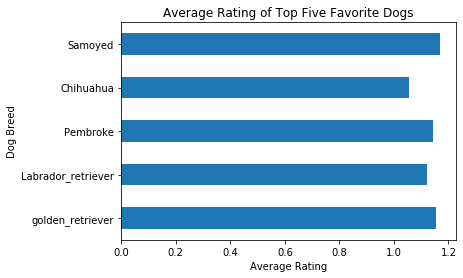

In [8]:
top5_rate_breed = df.groupby('dog_breed').mean().rating[['golden_retriever', 'Labrador_retriever',
                                                         'Pembroke', 'Chihuahua','Samoyed']]
top5_rate_breed.plot(kind='barh')
plt.xlabel('Average Rating')
plt.ylabel('Dog Breed')
plt.title('Average Rating of Top Five Favorite Dogs');

**From the scatter plot matrix below and calculation of the correlation coefficient, I found that *Retweet counts* and *Favorite counts* have strong linear relationship as its correlation coefficient is closer to 1, while *Rating* and *Retweet Counts*/*Favorite counts* have weak linear relationship.**

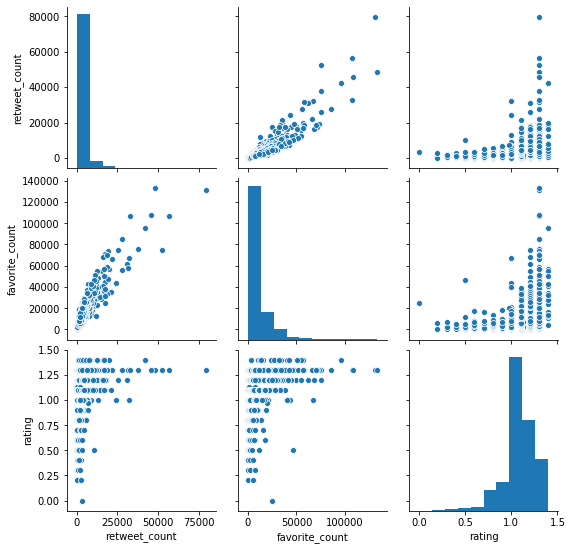

In [9]:
sns.pairplot(df[['retweet_count','favorite_count','rating']]);

**From simple linear regression model, I found that retweet counts can be used to predict favorite counts as R-squared equals to 0.834 and the p-value for retweet counts is 0. For every one count increse in retweet, the predicted increase in favorite counts is by 2.3936. On the contrary, rating is not a good variable to predict favorite counts as the R-squared is only 0.181.**

**From multiple linear regression model, I found that rating, retweet_count, and year can be used to predict favorite counts as R-squared equals to 0.926 and the p-value for each variable is 0. The predicted difference between the year of 2015/2016 and 2017, holding all other variables constant is -10930/-9273, suggesting that favorite counts increase over time due to the growth in popularity of the twitter account.**

To sum up, the popularity of a tweet increases over time as the twitter account grows, while the rating of a tweet alone donesn't have much impact on the popularity. I assume that the popularity of a tweet would be affected by other variables such as the assets(images or videos) or the dog stage, but I don't have enough data to test the hypothesis.